In [1]:
#importing needed modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#make sure plots are inline with notebook
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [2]:
#display 2 decimal signs, instead of 6 as default
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#load the dataset
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [4]:
#check if there is any missing value in our data
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [5]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)

In [6]:
#number of rows and columns, datasize
df.columns
df.shape

(41188, 21)

# Overview of python libraries for visual data analysis


# MATPLOTLIB

<AxesSubplot:>

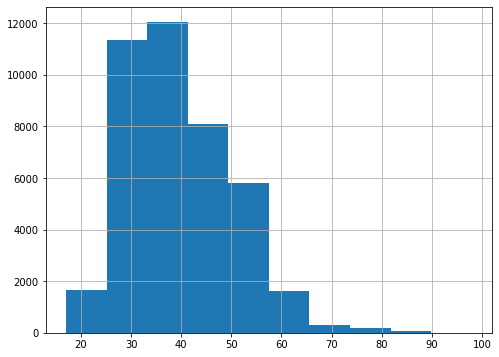

In [7]:
#age demographic
df["age"].hist()

# The histogram shows that most clients are between 25 - 50

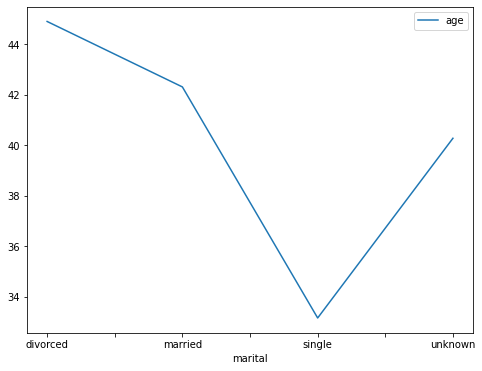

In [8]:
df[["age", "marital"]].groupby(
    "marital"
).mean().plot();

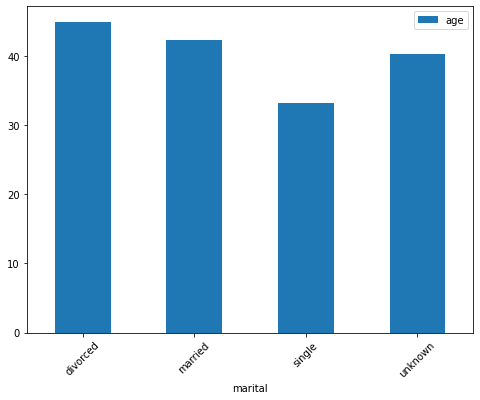

In [9]:
df[["age", "marital"]].groupby(
    "marital"
).mean().plot(kind="bar", rot=45);

# The plots show that the average age of single clients is significantly lower than other clients

# SEABORN

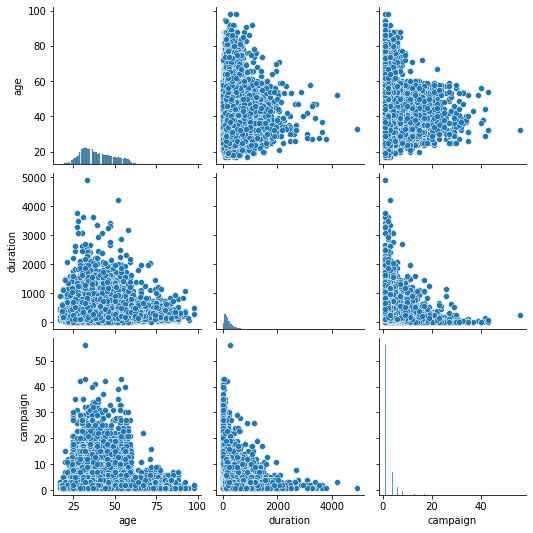

In [10]:
sns.pairplot(
    df[["age", "duration", "campaign"]]
);

# It seems there is a decrease in the duration of contact with the client with an increase in their contact quantity during the campaign

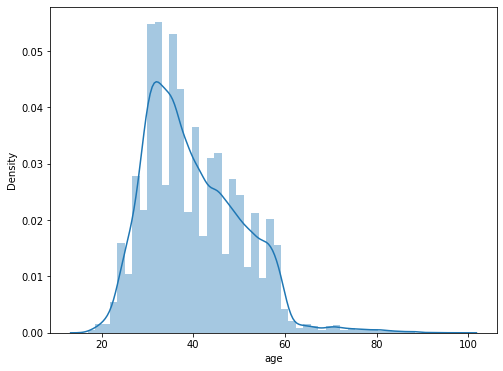

In [11]:
sns.distplot(df.age);

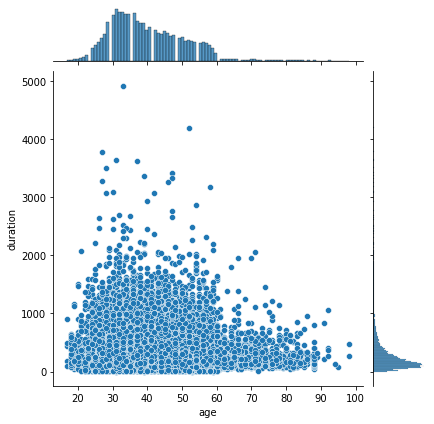

In [12]:
sns.jointplot(x="age", y="duration", data=df, kind="scatter")

<AxesSubplot:xlabel='age', ylabel='job'>

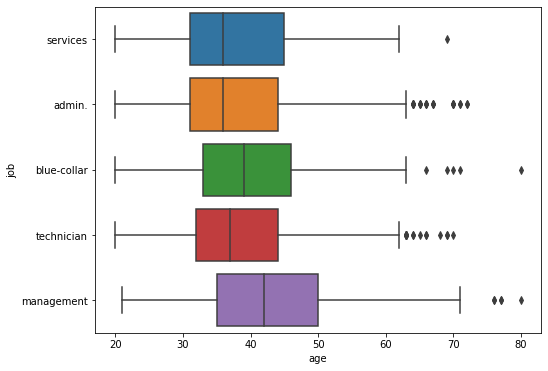

In [13]:
top_jobs = (
    df.job.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h"
)

# The plot shows that among the top-5 client categories by the type of employment, the most senior customers represent the management, and the largest number of outliers is among the categories of admin. and technician.

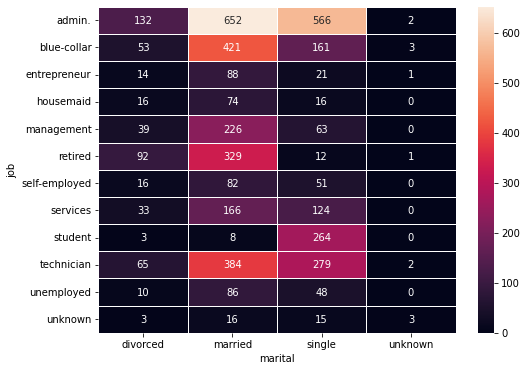

In [14]:
job_marital_y = (
    df.pivot_table(
        index="job", columns="marital", values="y", aggfunc=sum
    )
)
sns.heatmap(job_marital_y, annot=True, fmt="d", linewidths=0.5);

# The plot shows that the largest number of attracted clients among administrative workers is married (652), and there is the smallest number of attracted clients among customers with an unknown family status.

# PLOTLY

In [15]:
age_df = (
    df.groupby("age")[["y"]]
    .sum()
    .join(df.groupby("age")[["y"]].count(), rsuffix='_count')
)
age_df.columns = ["Attracted", "Total Number"]

In [16]:
trace0 = go.Scatter(x=age_df.index, y=age_df["Attracted"], name="Attracted")
trace1 = go.Scatter(x=age_df.index, y=age_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Statistics by client age"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [17]:
month_index = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
month_df = (
    df.groupby("month")[["housing"]]
    .sum()
    .join(df.groupby("month")[["y"]].count(), rsuffix='_count')
).reindex(month_index)
month_df.columns = ["Attracted", "Total Number"]

In [18]:
trace0 = go.Bar(x=month_df.index, y=month_df["Attracted"], name="Attracted")
trace1 = go.Bar(x=month_df.index, y=month_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Share of months"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [19]:
data = []

for status in df.marital.unique():
    data.append(go.Box(y=df[df.marital == status].age, name=status))
iplot(data, show_link=False)

# The plot shows the distribution of clients by age, the presence of outliers for all categories of the family status, except for unknown

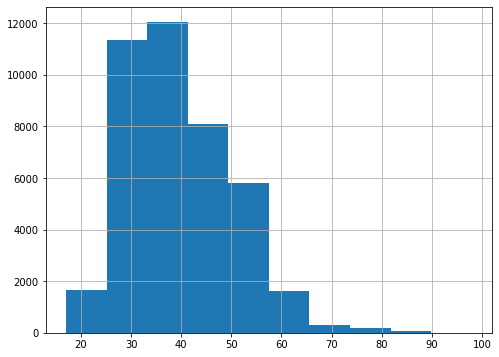

In [20]:
#Histograms are used for the analysis of numerical features
df["age"].hist();

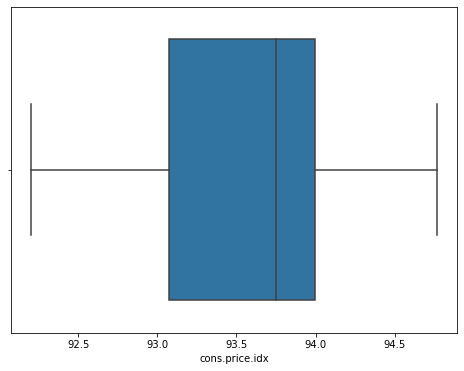

In [21]:
#Box plots are used for the analysis of numerical features
sns.boxplot(df["cons.price.idx"]);

In [22]:
#calculate client distribution of marital status
df["marital"].value_counts().head()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [23]:
#client distribution on the fact of their involvement for signing a deposit
df["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

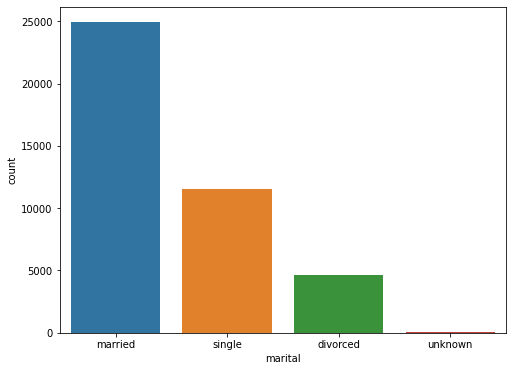

In [24]:
#graphical representation
sns.countplot(df["marital"]);

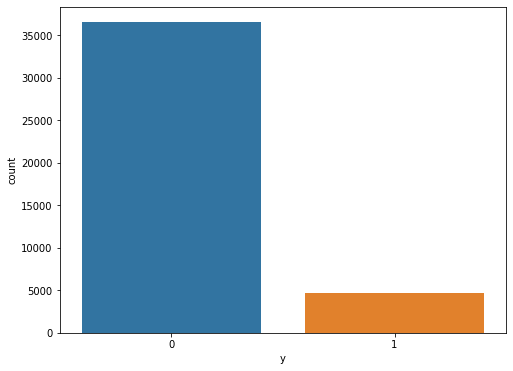

In [25]:
#graphical representation
sns.countplot(df["y"]);

[None, None, None, None, None, None, None, None, None, None]

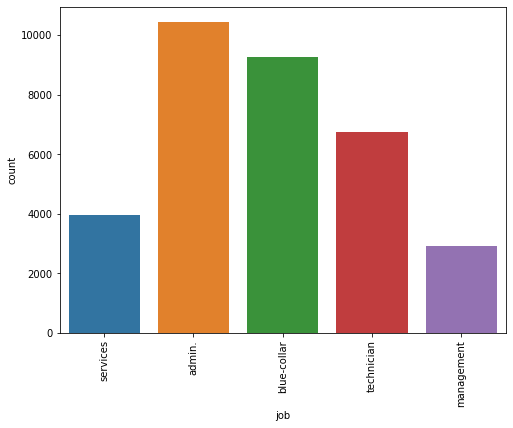

In [26]:
#graphical client distribution by the 5 most common types of employment
plot = sns.countplot(df[df["job"].isin(df["job"].value_counts().head(5).index)]["job"])
plt.setp(plot.get_xticklabels(), rotation=90)

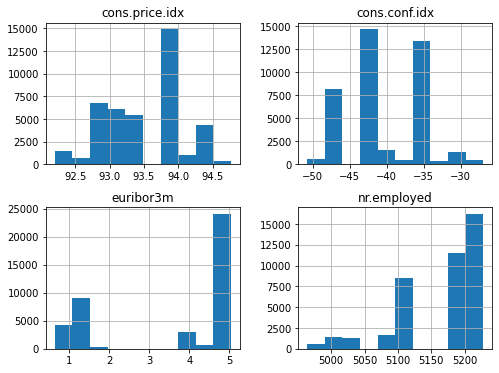

In [27]:
#visualize the values of the economy macro indicators from the dataset
feat = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

df[feat].hist();

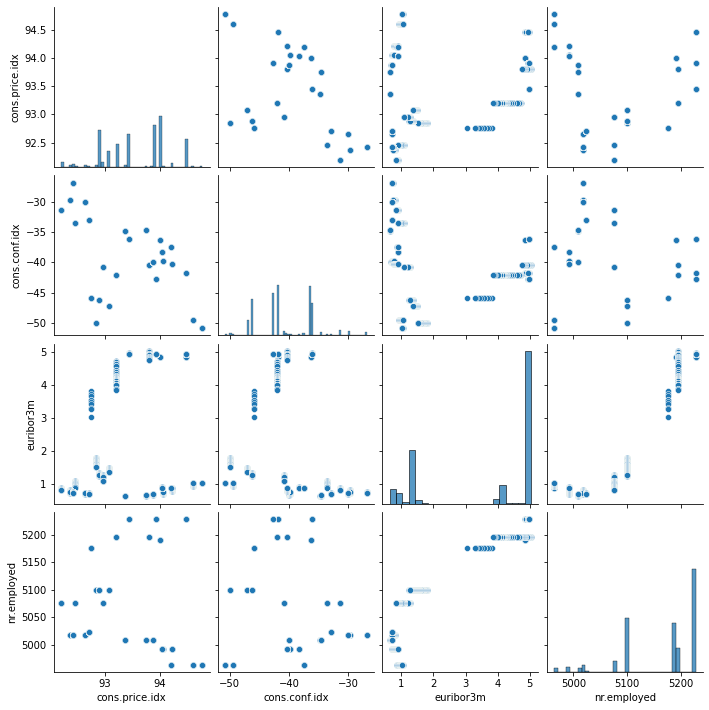

In [28]:
#we build a pairplot set
sns.pairplot(df[feat]);

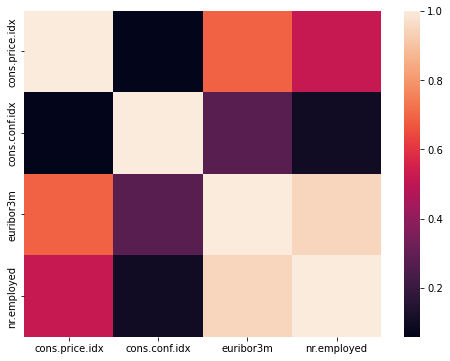

In [29]:
#build a heatmap for the economy macroindicators
sns.heatmap(df[feat].corr());

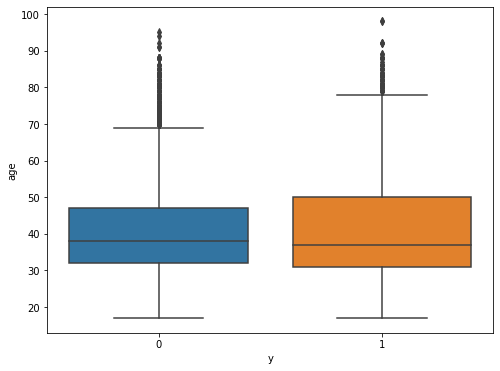

In [30]:
#age feature boxplot by the tarfet feature
sns.boxplot(x="y", y="age", data=df);

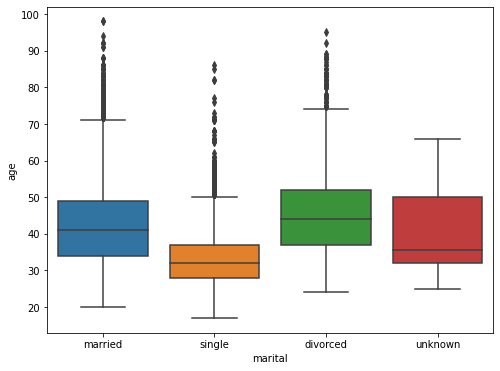

In [31]:
# box plot for the marital feature with sns.boxplot function.
sns.boxplot(x="marital", y="age", data=df);

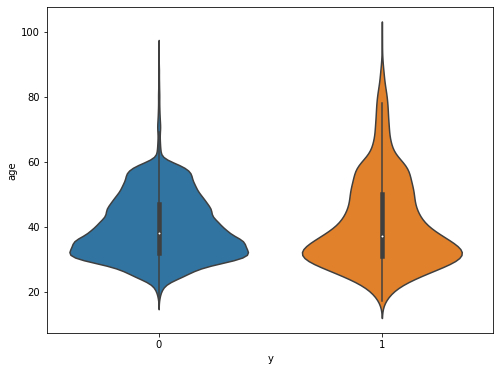

In [32]:
#violin plot shows the distribution of quantitative data 
#across several levels of one (or more) categorical variables 
#such that those distributions can be compared.
sns.violinplot(x="y", y="age", data=df);

In [33]:
#Calculate the mean client for the grouping by the housing feature values.
df.groupby("housing")["age"].mean()

housing
no        40.04
unknown   39.95
yes       40.01
Name: age, dtype: float64

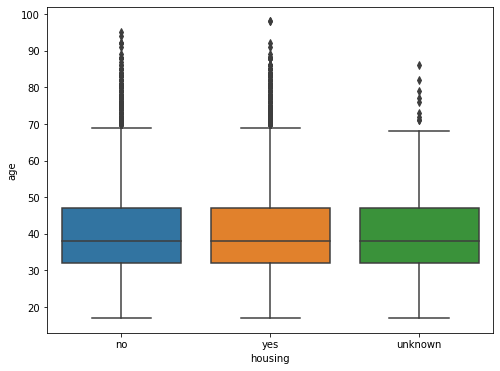

In [34]:
#Build a box plot for the age feature by the housing values with sns.boxplot function.
sns.boxplot(x="housing", y="age", data=df);

In [35]:
#Calculate the interaction between target and client marital status features
pd.crosstab(df["age"], df["marital"])

marital,divorced,married,single,unknown
age,,,,
17,0,0,5,0
18,0,0,28,0
19,0,0,42,0
20,0,1,64,0
21,0,8,94,0
...,...,...,...,...
91,0,2,0,0
92,1,3,0,0
94,0,1,0,0


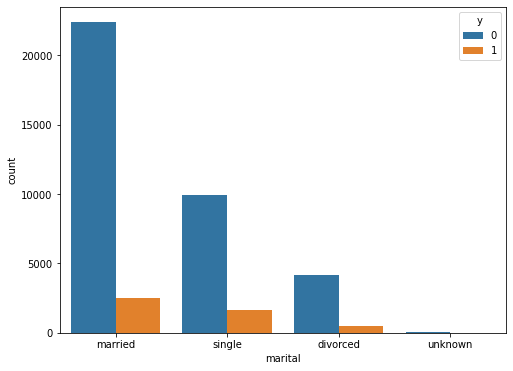

In [36]:
#visualize the interaction between target and client marital status features
sns.countplot(x="marital", hue="y", data=df);

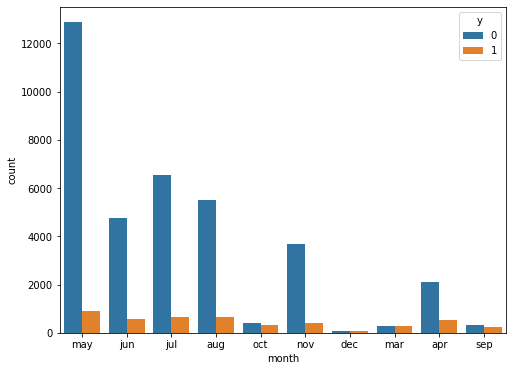

In [37]:
#Build the count plot for the month feature by the y feature target values with sns.countplot function
sns.countplot(x="month", hue="y", data=df);

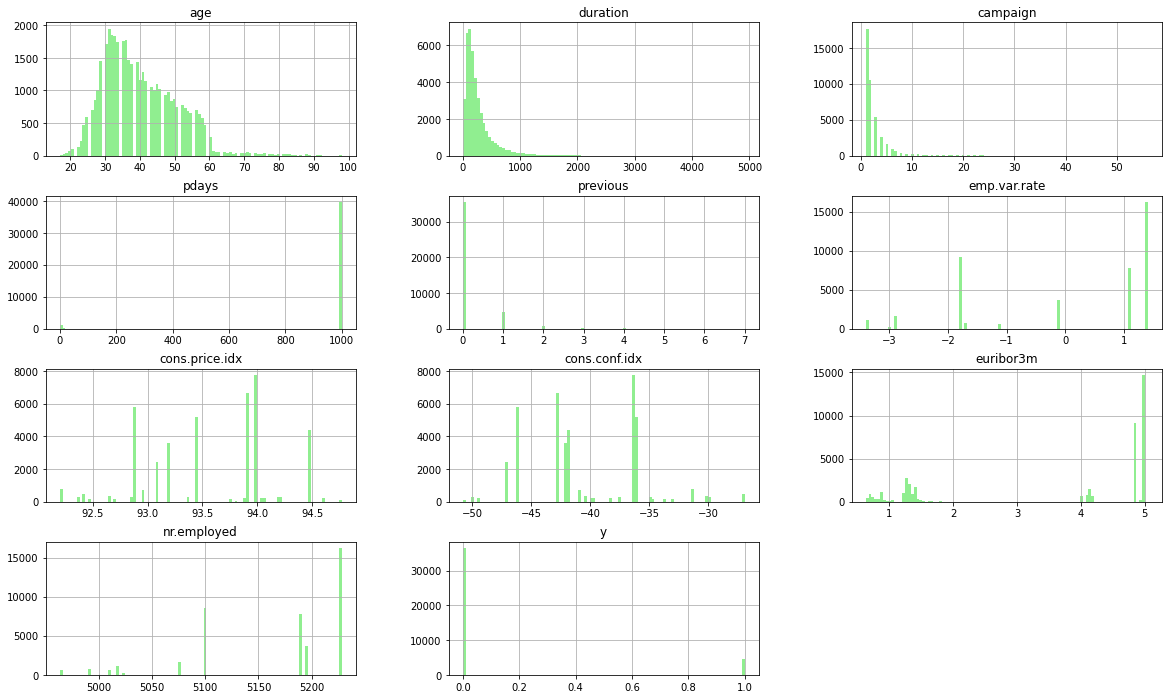

In [38]:
categorical = []
numerical = []
for feature in df.columns:
    if df[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)

#Let's look at the distribution of numerical features with hist function
df[numerical].hist(figsize=(20,12), bins=100, color='lightgreen');

In [39]:
df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


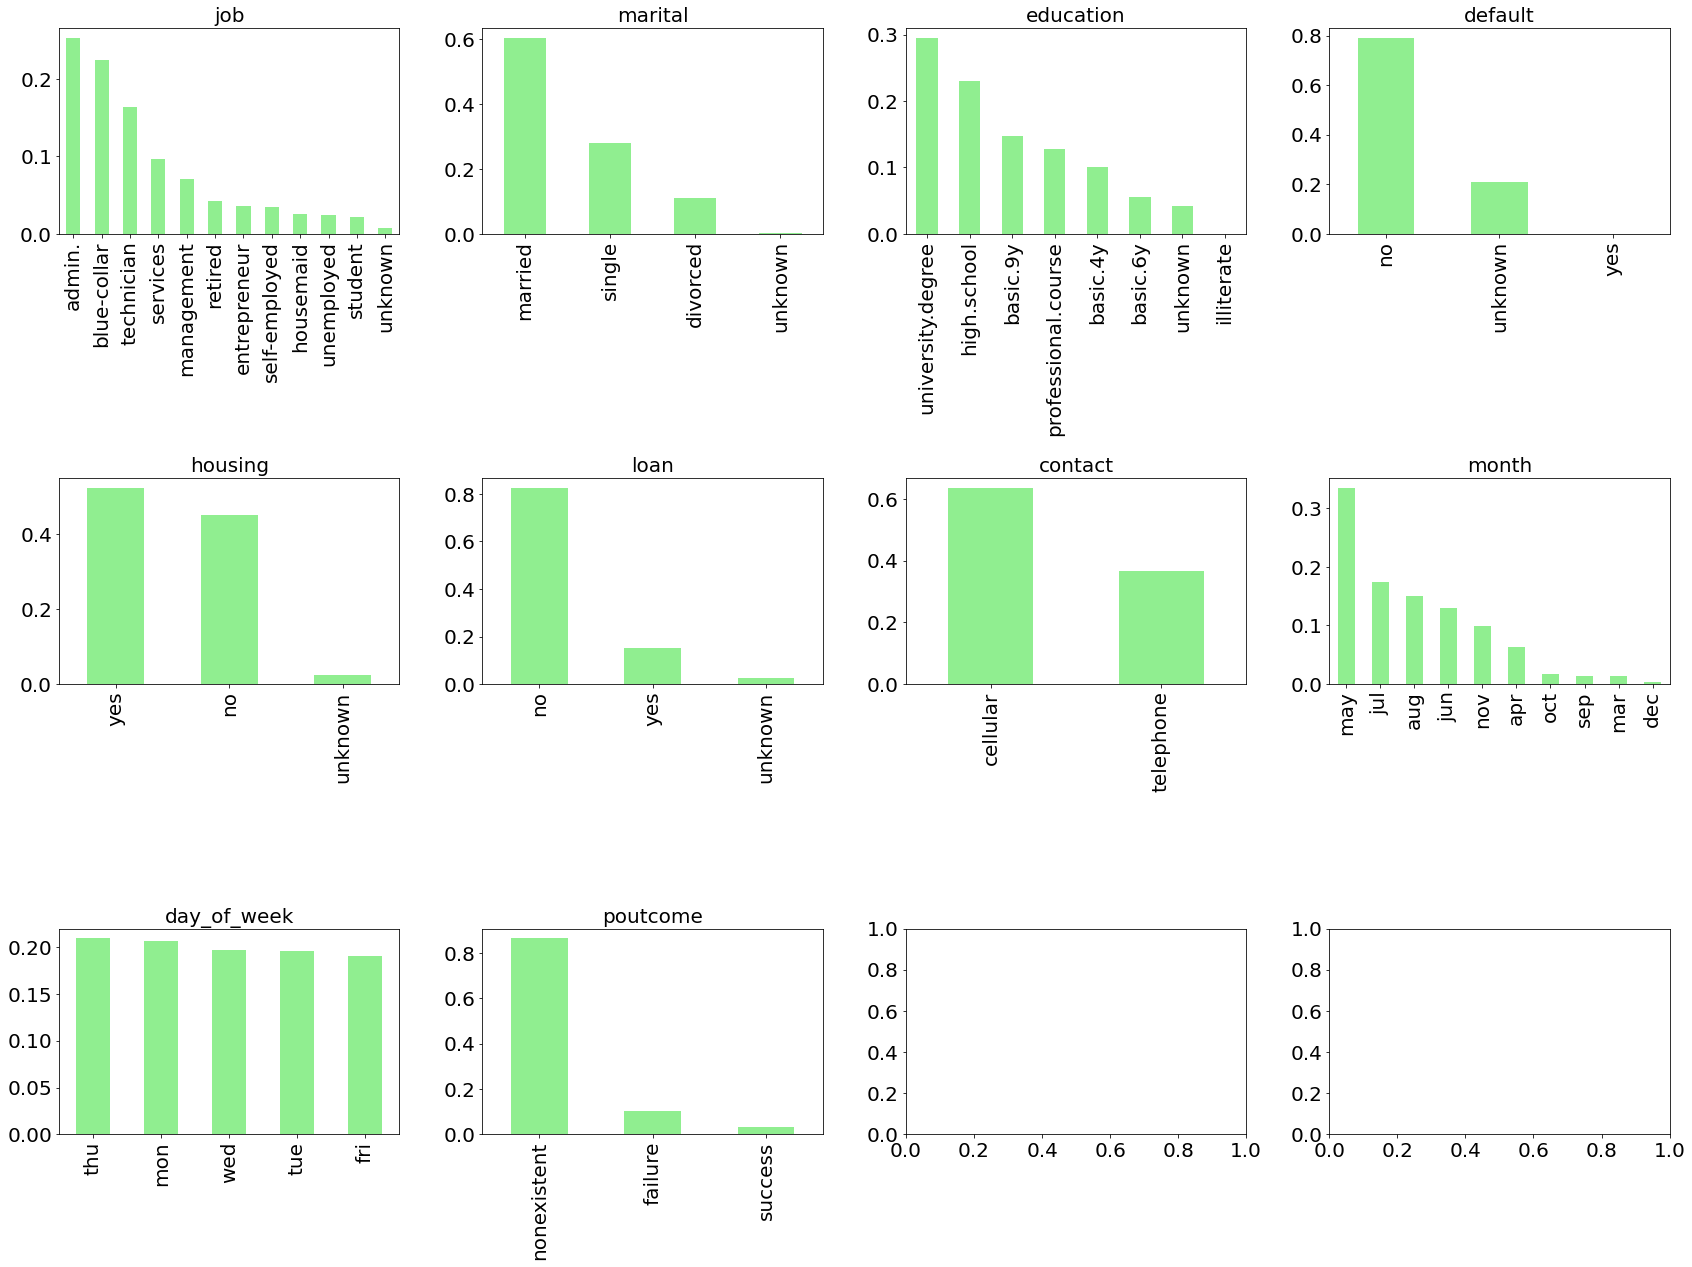

In [40]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20

fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df[categorical[i]].value_counts(normalize=True).plot(kind='bar', label=categorical[i], ax=axes[i//4, i%4], color='lightgreen')
    axes[i//4, i%4].set_title(categorical[i])
plt.tight_layout()

In [41]:
#correlation matrix
correlation_table = df.corr()
correlation_table

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02,0.03
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04,0.41
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14,-0.07
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37,-0.32
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50,0.23
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91,-0.30
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52,-0.14
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10,0.05
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95,-0.31
nr.employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00,-0.35


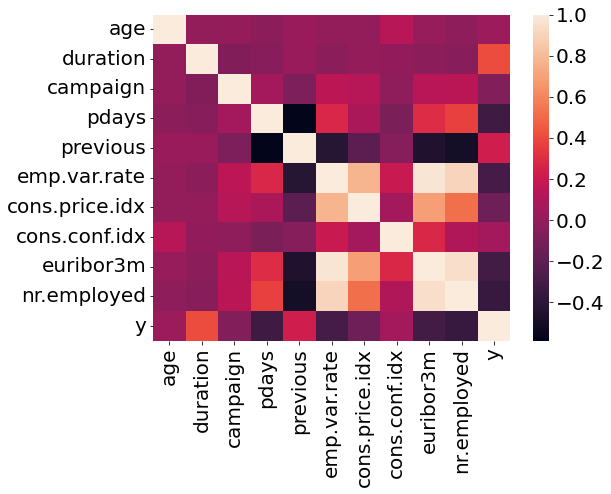

In [42]:
#visualise the correlation matrix
sns.heatmap(correlation_table);

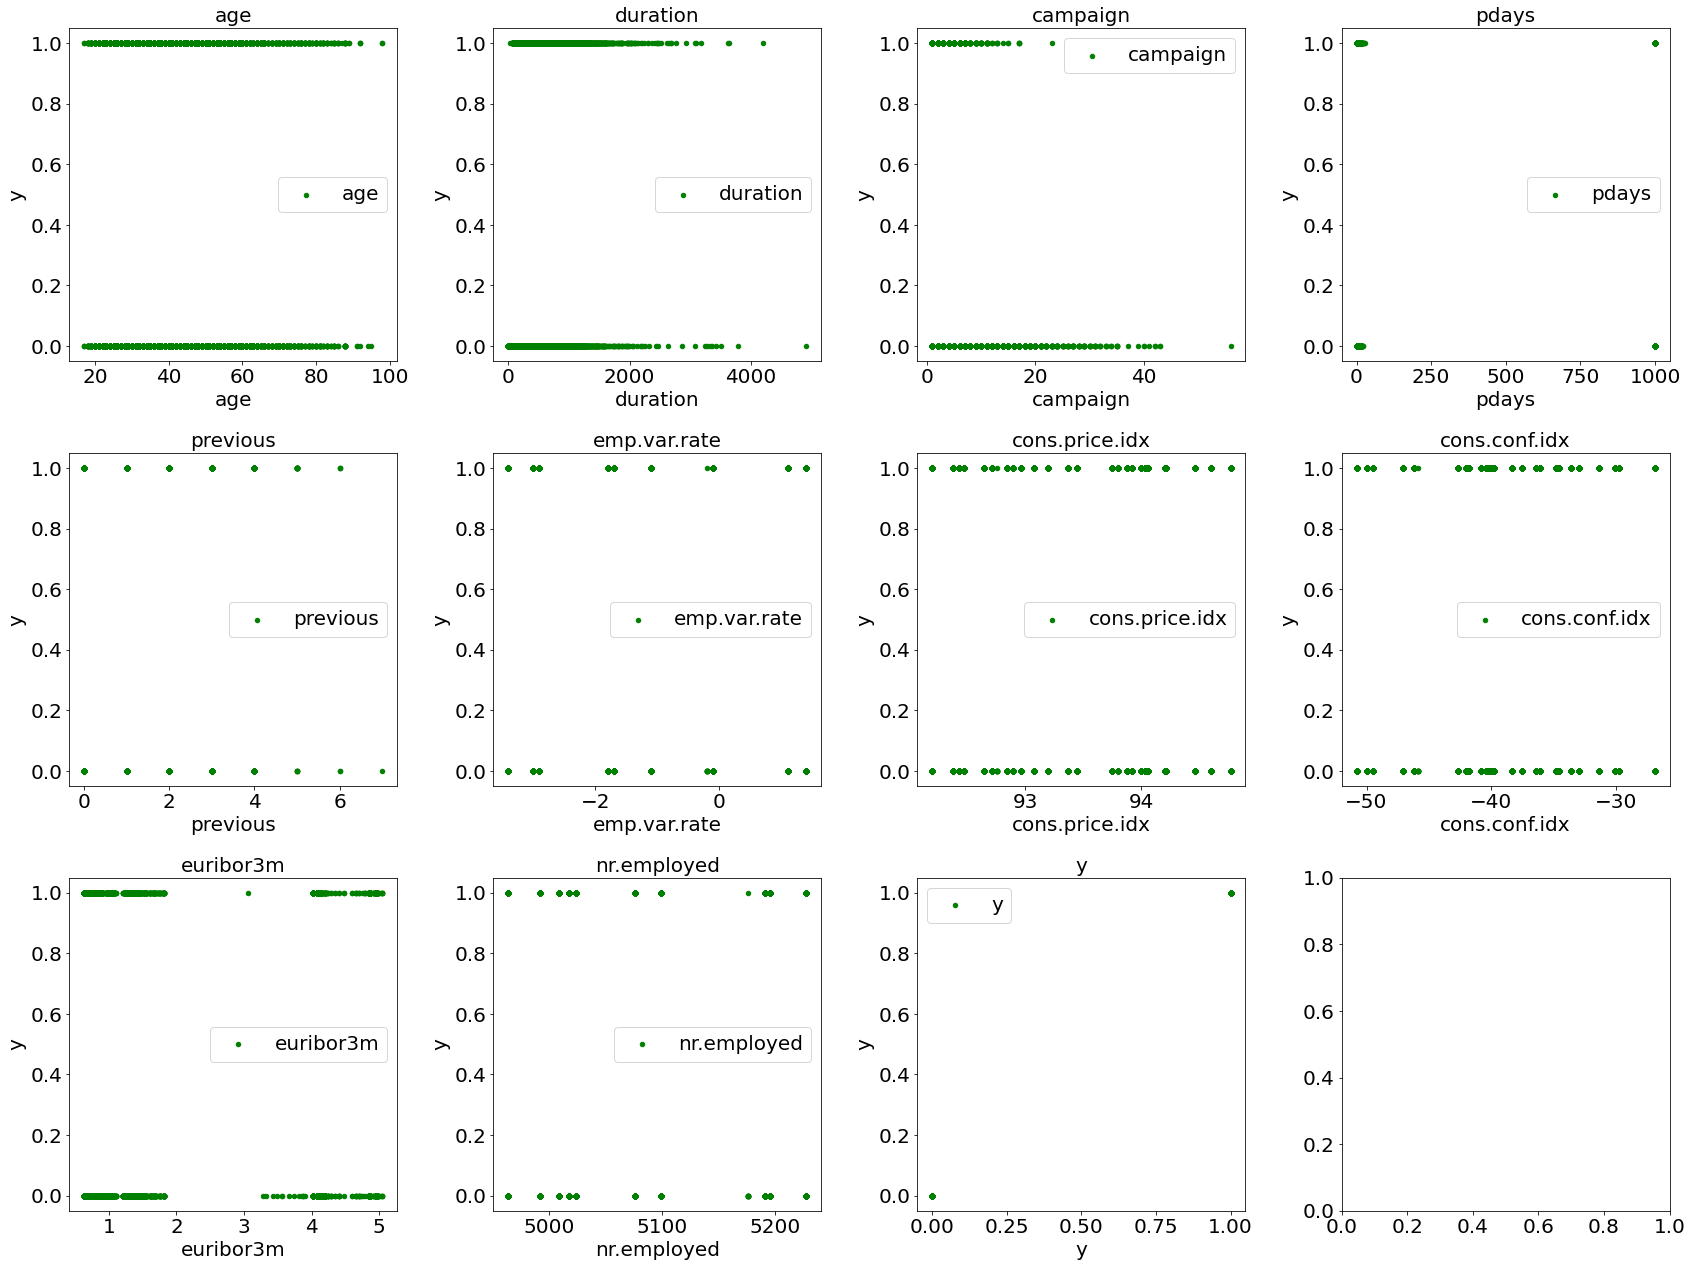

In [43]:
fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(numerical)):
    df.plot(x=numerical[i], y = 'y', label=numerical[i], ax=axes[i//4, i%4], kind='scatter', color='green')
    axes[i//4, i%4].set_title(numerical[i])
plt.tight_layout()

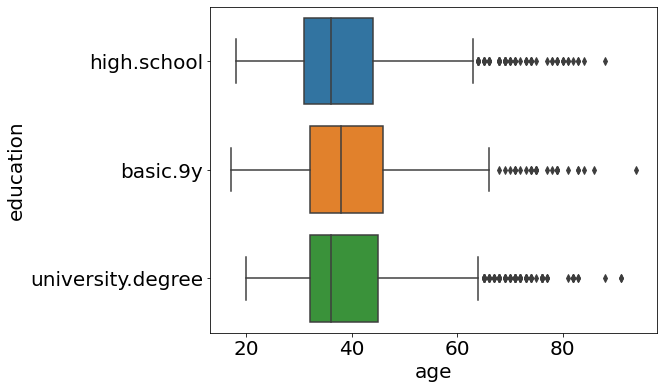

In [44]:
#visualize the distribution of positive target responses by groups
top_3 = df.education.value_counts().sort_values(ascending=False).head(3).index.values

sns.boxplot(y="education", x="age", data=df[df.education.isin(top_3)], orient="h");
